In [1]:
import numpy as np
import holoviews as hv
import math
import scipy.sparse.linalg as linalg
#matplotlib inline
import matplotlib.pyplot as plt

hv.notebook_extension()

In [2]:
dp = 1 #1
dt = 0.05 #0.3
p0 = 0.15 #
L = 1000 #4000
T = 5

In [3]:
p = np.linspace(0, L, num = int(L/dp))
psi_m = np.zeros(shape = (int(L/dp), int(T/dt))) + 0j
psi_r = np.zeros(shape = (int(L/dp), int(T/dt))) + 0j

psi_m[:, 0] = np.exp(-(p-p0)**2/2)
#si[:, 0] = np.sin(np.pi*x/L)

#   Normalize wave function
psi_m[:, 0] = psi_m[:,0]/np.linalg.norm(psi_m[:, 0])

In [4]:
def barrier(x):
    if x>600 and x<700:
        return 1000000
    else:
        return 0
    
V = np.vectorize(barrier)(p)
#V = np.zeros(int(L/dp))

In [5]:
for i in range(0, int(T/dt)-1):
    psi_r[:, i] = np.fft.ifft(psi_m[:, i]*np.exp(-dt*1j*p**2/2), norm = "ortho")
    psi_m[:, i+1] = np.fft.fft(psi_r[:, i]*np.exp(-dt*1j*V), norm = "ortho")
    

b':HoloMap   [Time]\n   :Overlay\n      .Curve.I  :Curve   [x]   (y)\n      .Curve.II :Curve   [x]   (y)'
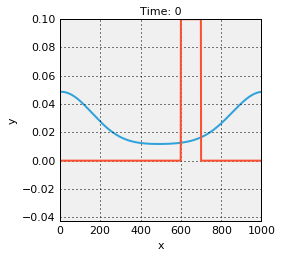
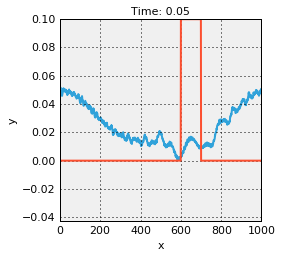
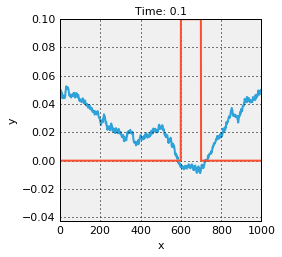
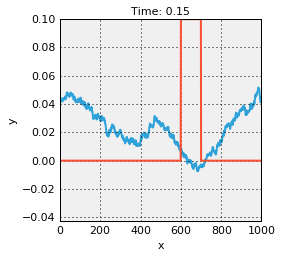
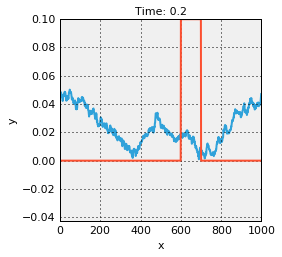
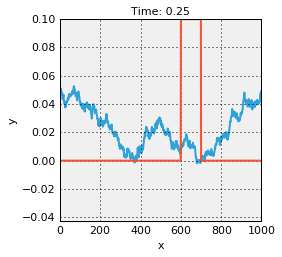
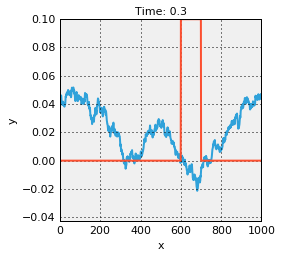
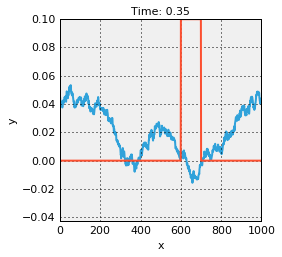
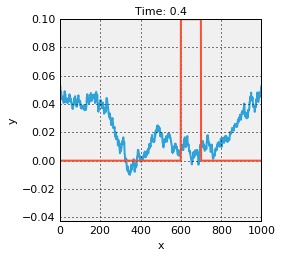
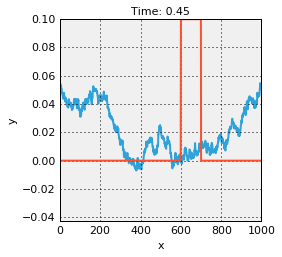
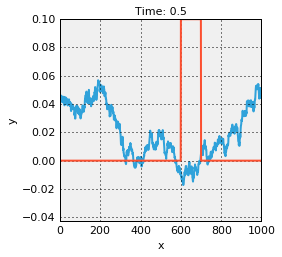
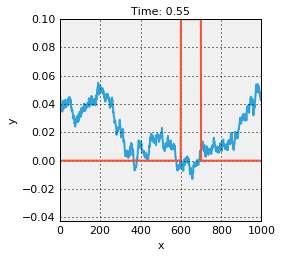
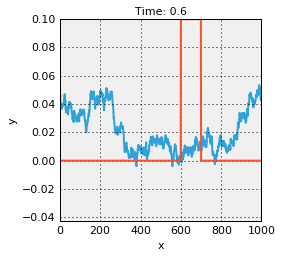
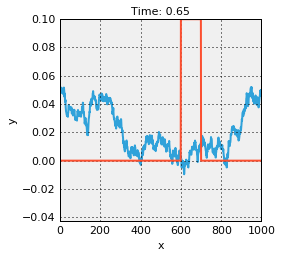
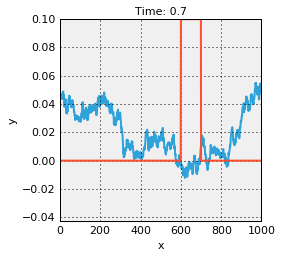
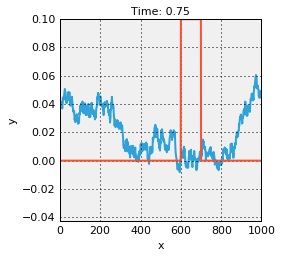
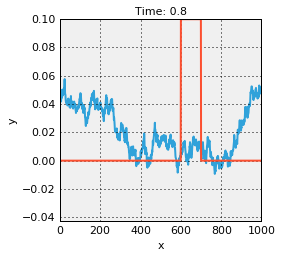
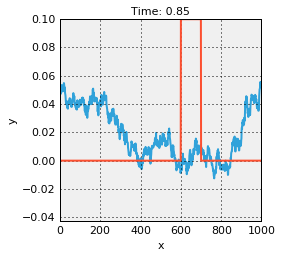
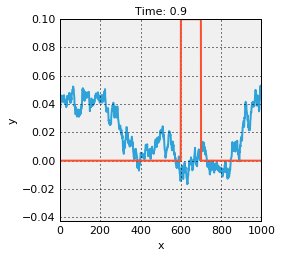
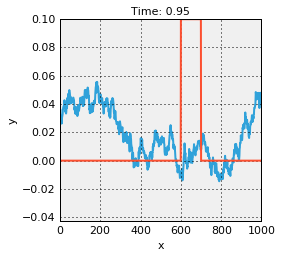
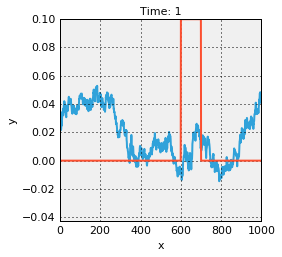
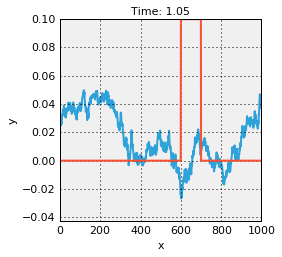
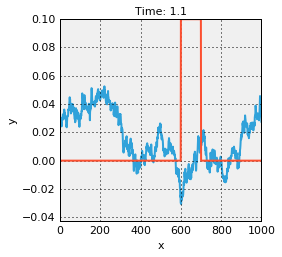
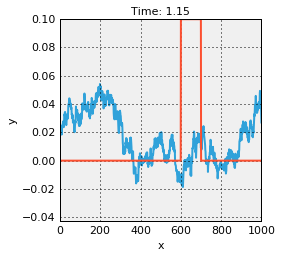
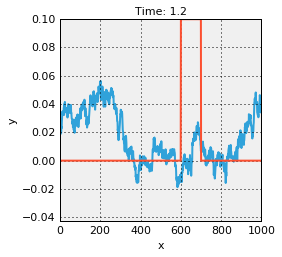
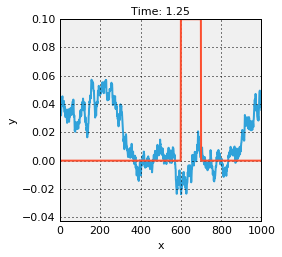
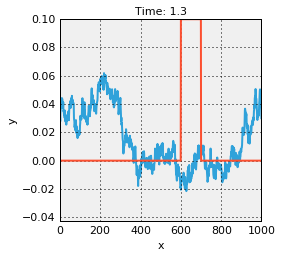
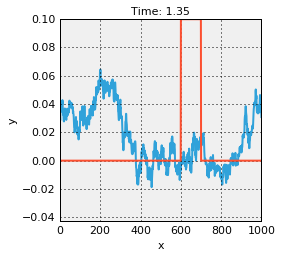
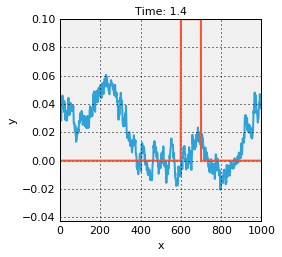
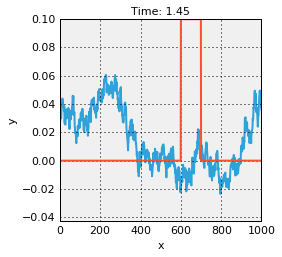
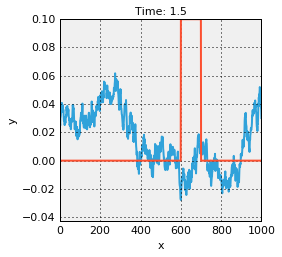
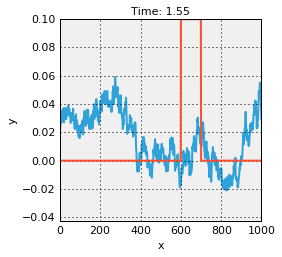
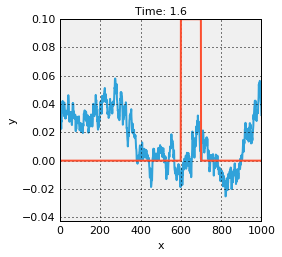
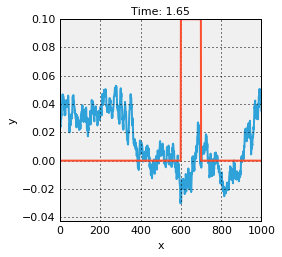
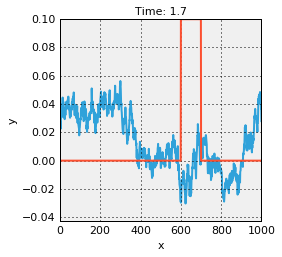
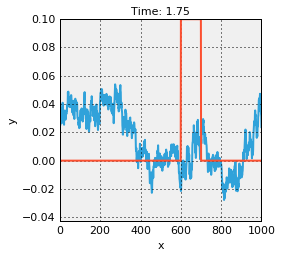
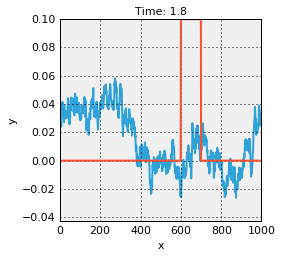
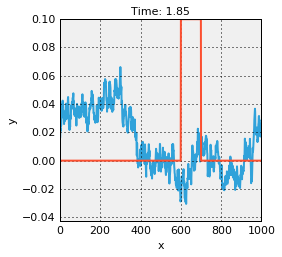
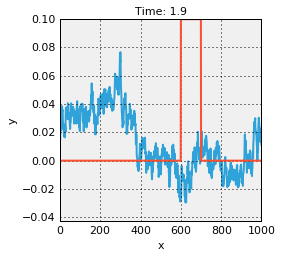
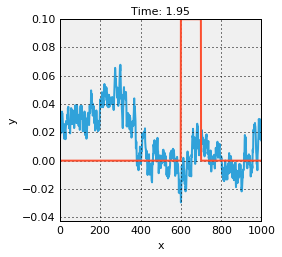
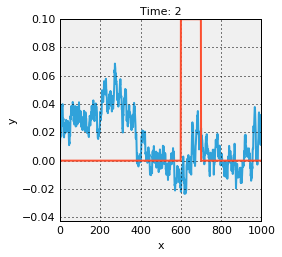
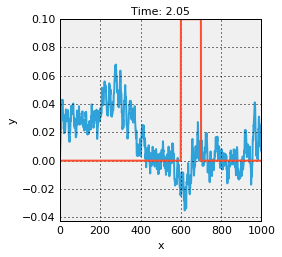
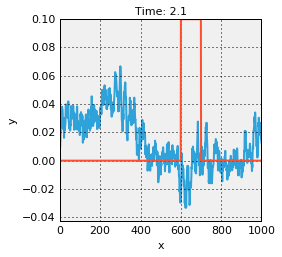
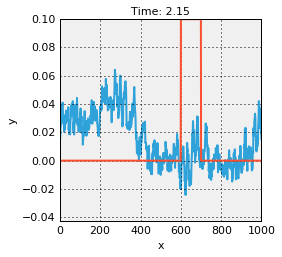
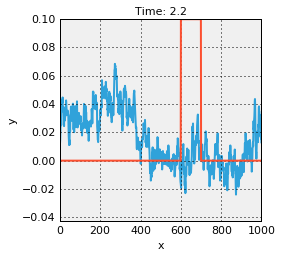
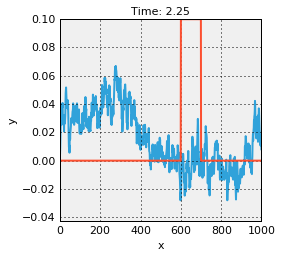
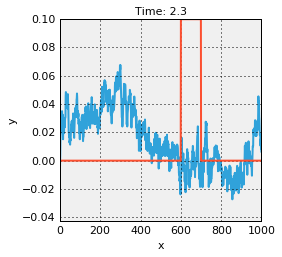
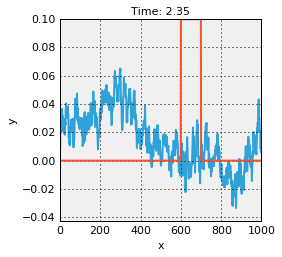
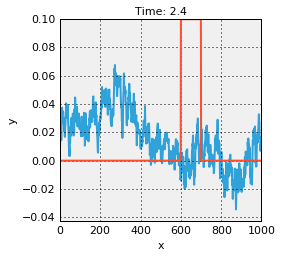
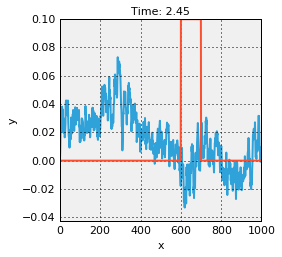
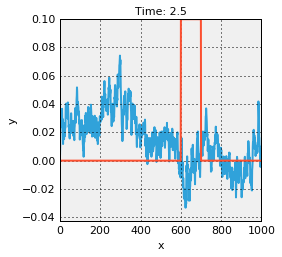
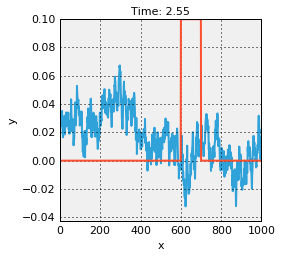
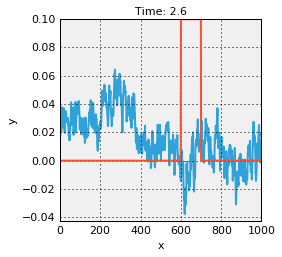
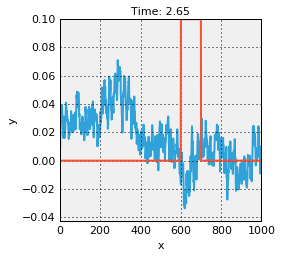
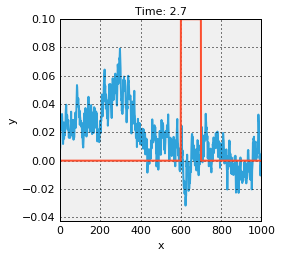
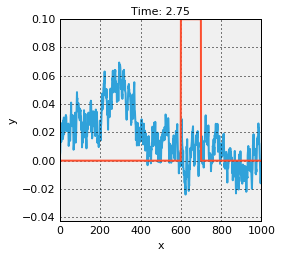
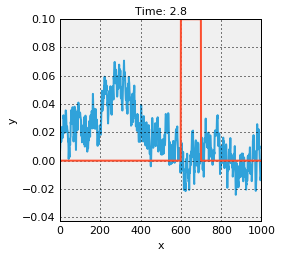
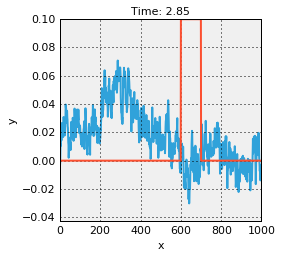
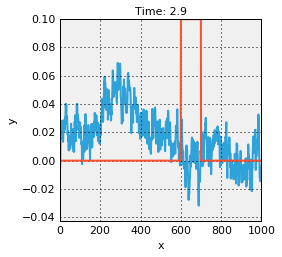
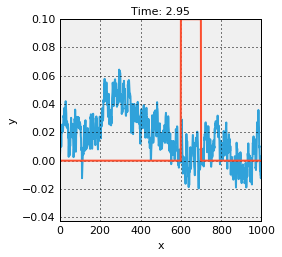
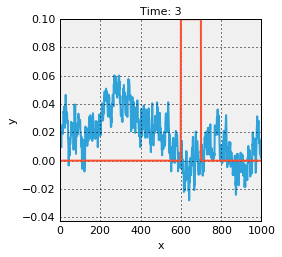
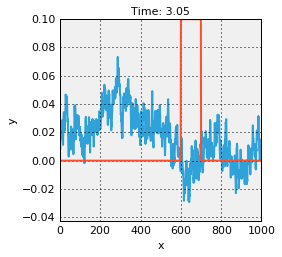
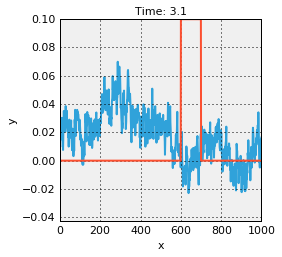
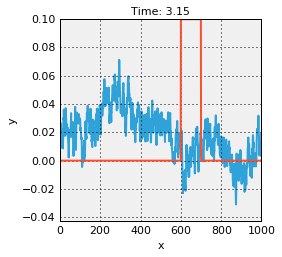
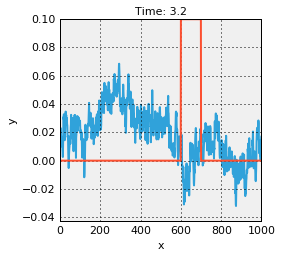
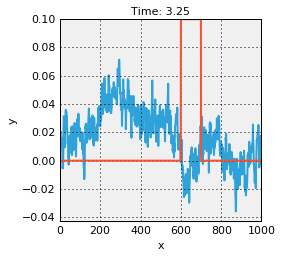
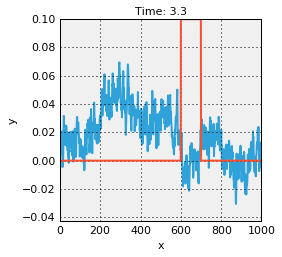
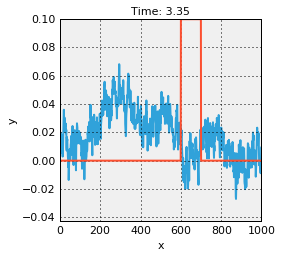
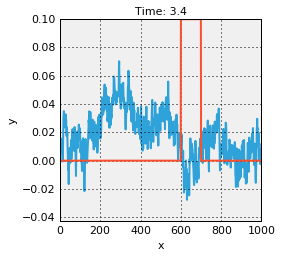
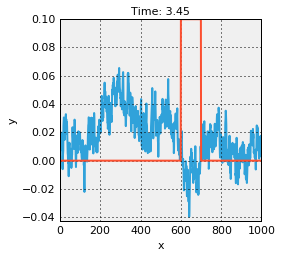
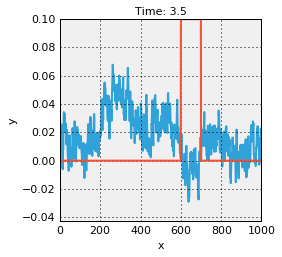
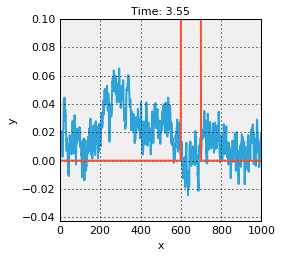
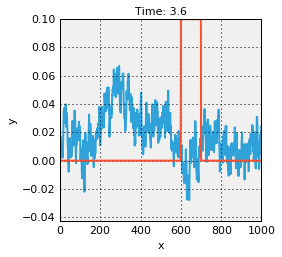
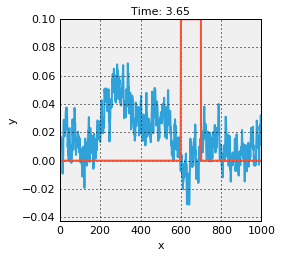
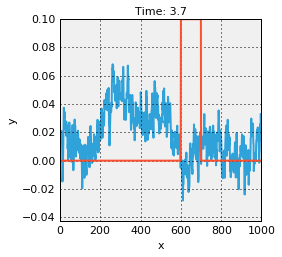
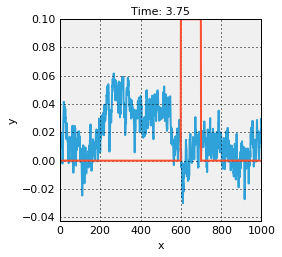
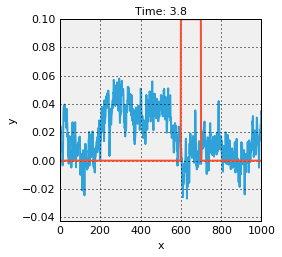
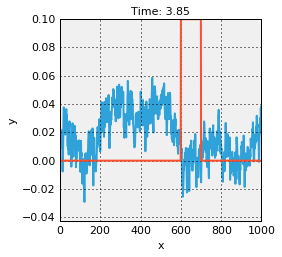
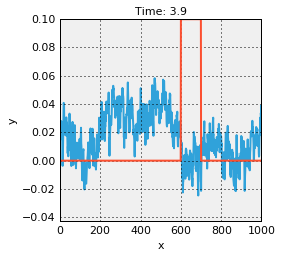
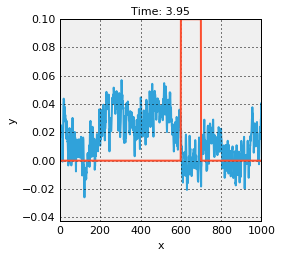
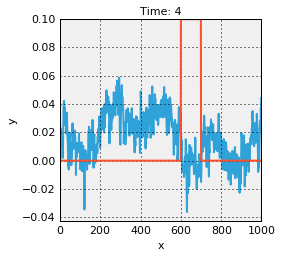
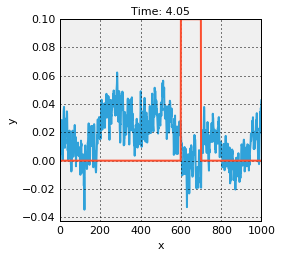
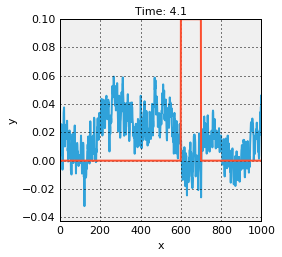
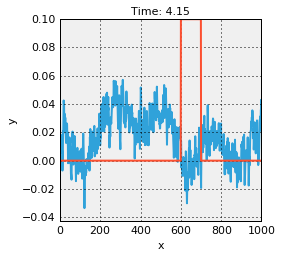
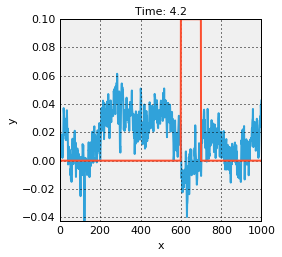
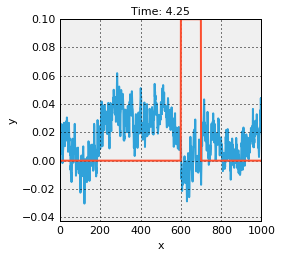
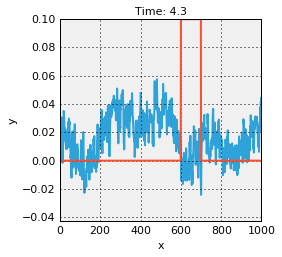
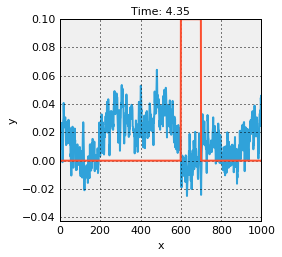
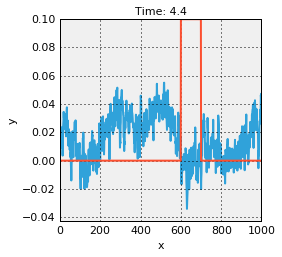
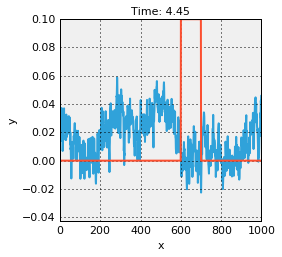
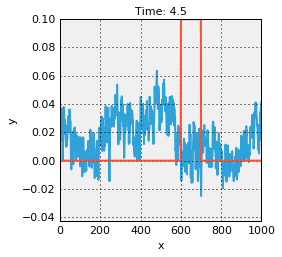
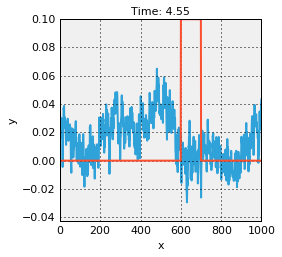
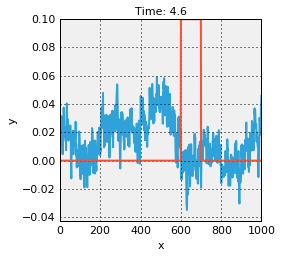
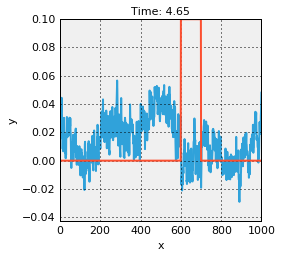
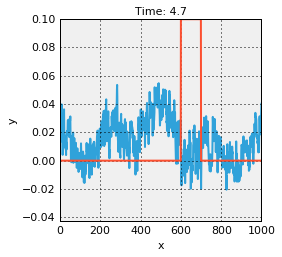
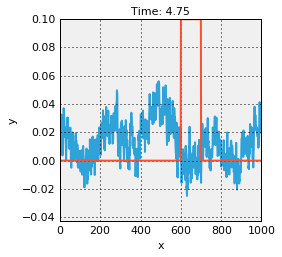
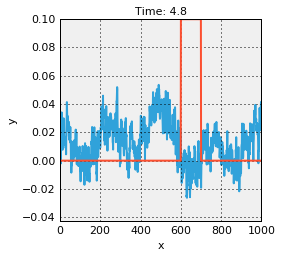
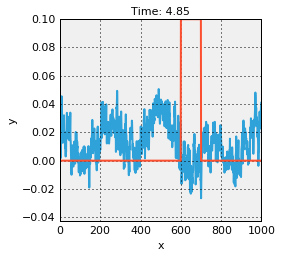
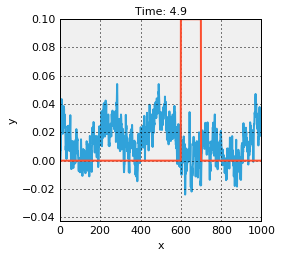
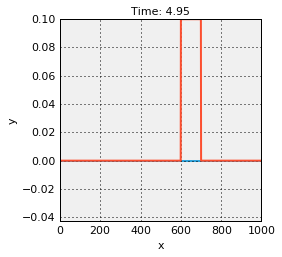

In [6]:
%output holomap='scrubber'
hv.HoloMap([(
            i*dt, hv.Curve(np.real(psi_r[:, i])) * hv.Curve(V*0.0000001))
            for i in range(int(T/dt))], kdims = ["Time"])

In [ ]:
%output holomap='scrubber'
hv.HoloMap([(
            i*dt, hv.Curve(np.abs(psi_m[:, i])) )
            for i in range(int(T/dt))], kdims = ["Time"])